In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load data from csv

df = pd.read_csv('academic Stress level - maintainance 1.csv')

stage_map = {
    'high school': 1,
    'undergraduate': 2,
    'post-graduate': 3
}

df['Your Academic Stage_encoded'] = df['Your Academic Stage'].map(stage_map)

env_map = {
    'Peaceful': 1,
    'Noisy': 2,
    'disrupted': 3  #
}
df['Study Environment_encoded'] = df['Study Environment'].map(env_map)

df['Bad_habits_encoded'] = df['Do you have any bad habits like smoking, drinking on a daily basis?'].apply(
    lambda x: 1 if 'Yes' in str(x) else 0)

df


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_encoded,Study Environment_encoded,Bad_habits_encoded
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5,2,2.0,0
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3,2,1.0,0
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4,2,1.0,0
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3,2,1.0,0
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
135,17/08/2025 13:02:04,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,3,4,2,1.0,0
136,18/08/2025 14:36:00,undergraduate,4,2,disrupted,Analyze the situation and handle it with intel...,No,3,3,2,3.0,0
137,18/08/2025 17:13:52,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,2,4,2,1.0,0
138,18/08/2025 19:08:52,undergraduate,4,5,disrupted,"Social support (friends, family)",No,5,5,2,3.0,0


Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index ', 'Your Academic Stage_encoded',
       'Study Environment_encoded', 'Bad_habits_encoded'],
      dtype='object')


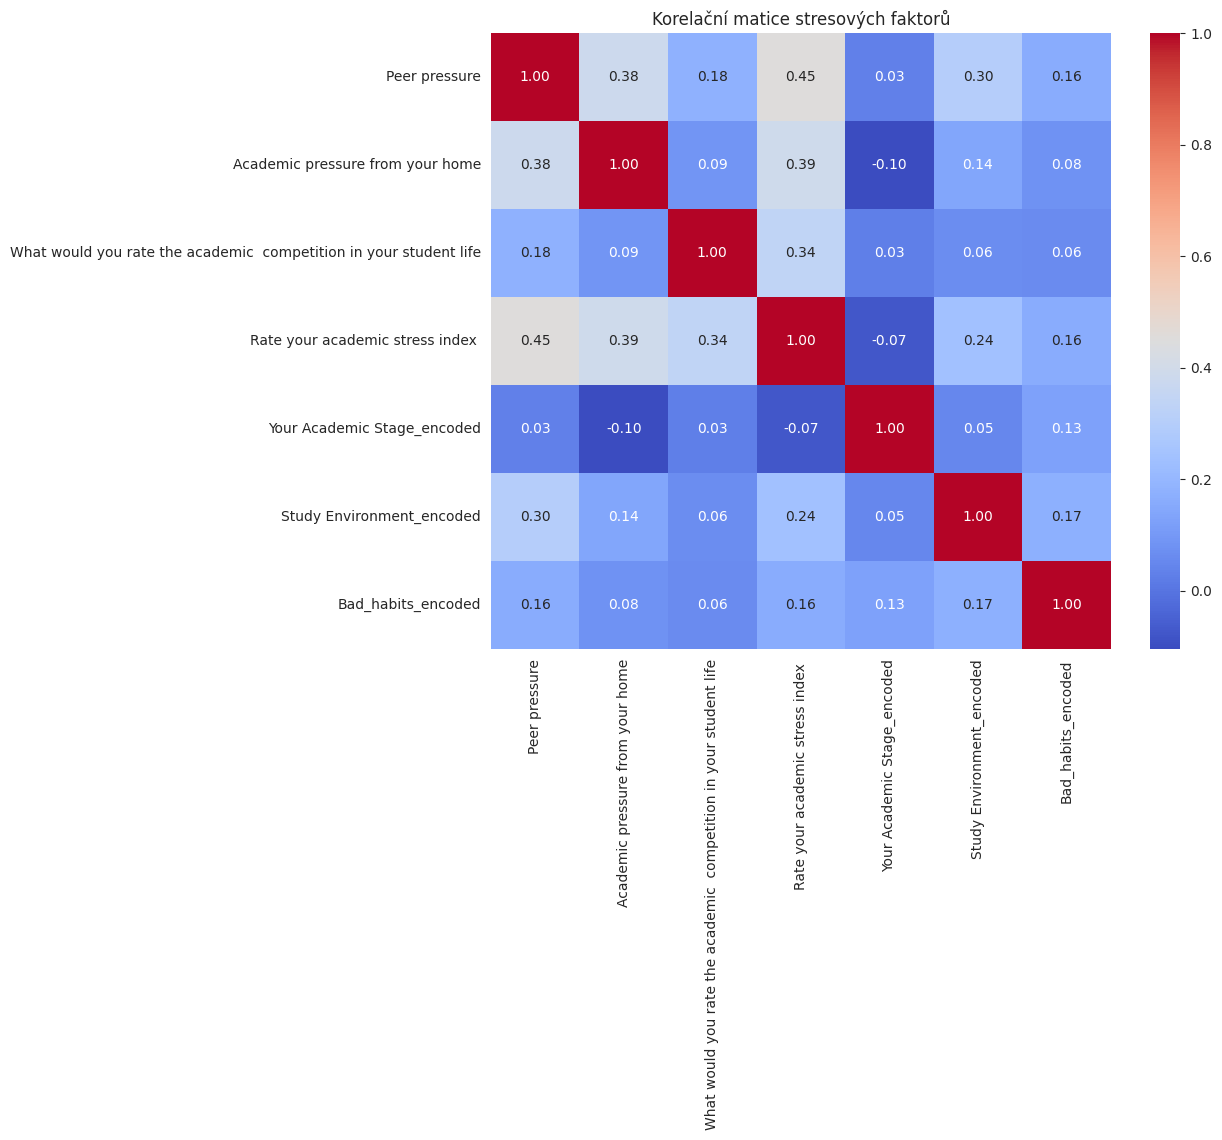

In [2]:
cols_to_correlate = [
    'Peer pressure',
    'Academic pressure from your home',
    'What would you rate the academic  competition in your student life',
    'Rate your academic stress index ',
    'Your Academic Stage_encoded',
    'Study Environment_encoded',
    'Bad_habits_encoded'
]
print(df.columns)

df_corr = df[cols_to_correlate]

correlation_matrix = df_corr.corr(method='spearman')  # not continous data -> spearman

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            )

plt.title('Korelační matice stresových faktorů')
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()


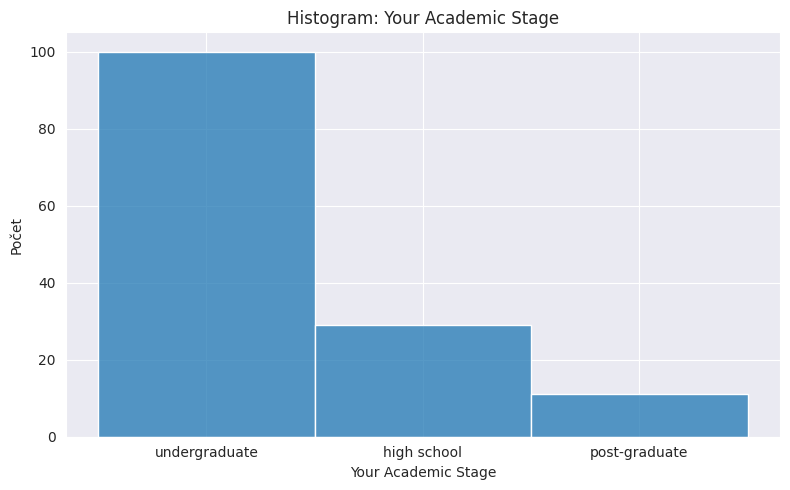

In [12]:
# calculate how many samples are in each category of Your Academic Stage

col = 'Your Academic Stage'

serie = df[col].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(serie, bins=30, kde=False)
plt.xlabel(col)
plt.ylabel('Počet')
plt.title(f'Histogram: {col}')
plt.tight_layout()
plt.show()

 Zpracovám tyto hodnty: [2, 1, 3]
Zpracovávám stage: high-school
Zpracovávám stage: undergraduate
Zpracovávám stage: post-graduate


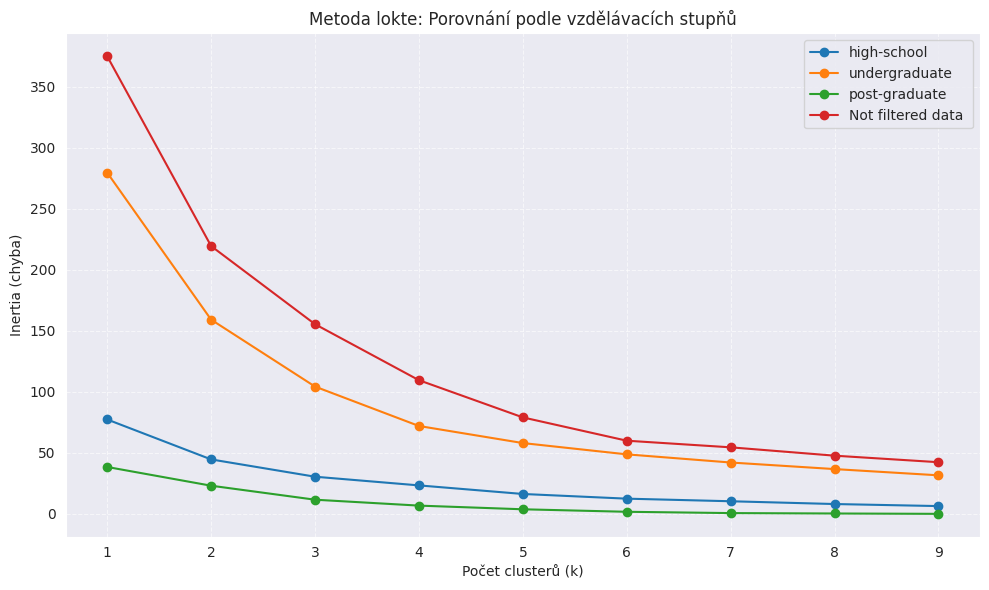

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = [
    'Peer pressure',
    'Academic pressure from your home',
    'Study Environment_encoded',
    'Bad_habits_encoded',
    'What would you rate the academic  competition in your student life'
]

stage_code_map = {
    1: 'high-school',
    2: 'undergraduate',
    3: 'post-graduate'
}
plt.figure(figsize=(10, 6))

print(f" Zpracovám tyto hodnty: {df['Your Academic Stage_encoded'].unique().tolist()}")

for stage_code in sorted(df['Your Academic Stage_encoded'].unique().tolist()):

    stage_name = stage_code_map.get(stage_code)
    print(f"Zpracovávám stage: {stage_name}")

    subset = df[df['Your Academic Stage_encoded'] == stage_code]

    X = subset[features].dropna()

    if len(X) < 5:
        print(f"Přeskakuji stage {stage_code} - nedostatek dat.")
        continue

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    inertia = []
    range_values = range(1, 10)

    for k in range_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_pca)
        inertia.append(kmeans.inertia_)

    label_text = stage_name

    plt.plot(range_values, inertia, marker='o', linestyle='-', label=label_text)



subset = df
X = subset[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

inertia = []
range_values = range(1, 10)

for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

label_text = "Not filtered data "

plt.plot(range_values, inertia, marker='o', linestyle='-', label=label_text)

plt.xlabel('Počet clusterů (k)')
plt.ylabel('Inertia (chyba)')
plt.title('Metoda lokte: Porovnání podle vzdělávacích stupňů')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()  # Zobrazí legendu s názvy stages
plt.tight_layout()
plt.savefig("loket.png", dpi=300)
plt.show()


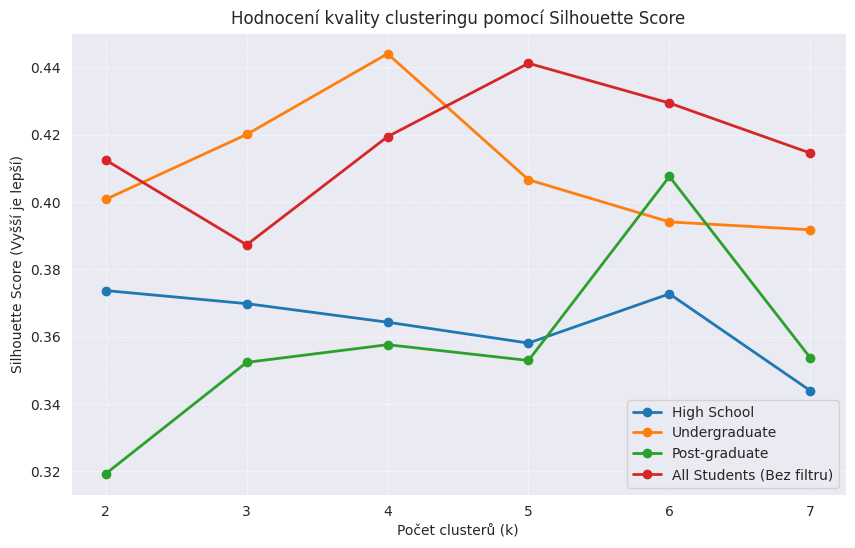

In [9]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Ukládání výsledků
results = []

k_values = [2, 3, 4, 5, 6, 7]

stage_names = {
    1: 'High School',
    2: 'Undergraduate',
    3: 'Post-graduate',
    'All': 'All Students (Bez filtru)'  # Nový popisek
}

stages = sorted(df['Your Academic Stage_encoded'].unique().tolist())
stages.append('All')

for stage_code in stages:

    if stage_code == 'All':
        subset = df.copy()
    else:
        subset = df[df['Your Academic Stage_encoded'] == stage_code].copy()

    X = subset[features].dropna()
    if len(X) < 5: continue

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Cyklus přes k a ukládání skóre
    scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, clusters)
        scores.append(score)

    # Uložení pro vykreslení
    results.append((stage_code, scores))

plt.figure(figsize=(10, 6))

for stage_code, scores in results:
    label = stage_names.get(stage_code, str(stage_code))
    plt.plot(k_values, scores, marker='o', label=label, linewidth=2)

plt.xlabel('Počet clusterů (k)')
plt.ylabel('Silhouette Score (Vyšší je lepší)')
plt.title('Hodnocení kvality clusteringu pomocí Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig("silhouette_score.png", dpi=300)
plt.show()

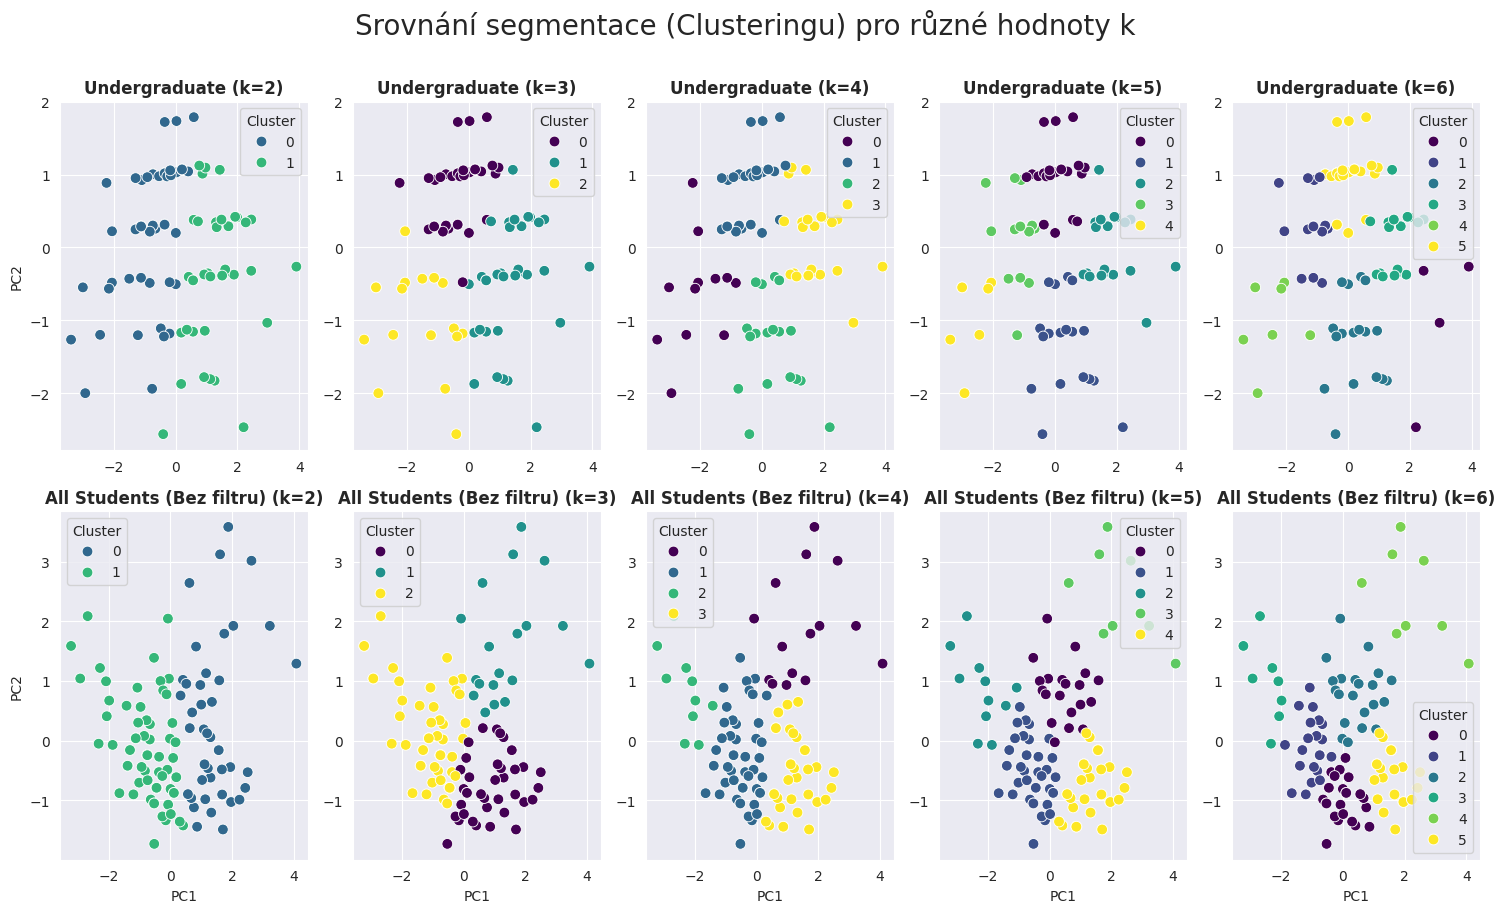

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

stage_names = {
    1: 'High School',
    2: 'Undergraduate',
    3: 'Post-graduate',
    'All': 'All Students (Bez filtru)'  # Nový popisek
}

k_values = [2, 3, 4, 5, 6]


stages = sorted(df['Your Academic Stage_encoded'].unique().tolist())
stages = [2]

stages.append('All')


fig, axes = plt.subplots(len(stages), len(k_values), figsize=(15, 9))  # Zvětšil jsem výšku

fig.suptitle('Srovnání segmentace (Clusteringu) pro různé hodnoty k', fontsize=20, y=1.01)

for row_idx, stage_code in enumerate(stages):

    if stage_code == 'All':
        subset = df.copy()
    else:
        subset = df[df['Your Academic Stage_encoded'] == stage_code].copy()

    X = subset[features].dropna()

    if len(X) < 5:
        for col_idx in range(len(k_values)):
            axes[row_idx, col_idx].text(0.5, 0.5, "Nedostatek dat", ha='center')
        continue


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)


    pca_base_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


    for col_idx, k in enumerate(k_values):
        ax = axes[row_idx, col_idx]


        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_pca)

        plot_df = pca_base_df.copy()
        plot_df['Cluster'] = clusters


        sns.scatterplot(
            x='PC1', y='PC2',
            hue='Cluster',
            data=plot_df,
            palette='viridis',
            s=60,
            ax=ax,
            legend='full'
        )

        # Popisky grafu
        stage_label = stage_names.get(stage_code, f'Stage {stage_code}')
        ax.set_title(f'{stage_label} (k={k})', fontsize=12, fontweight='bold')

        # Skrytí popisků os pro přehlednost (kromě krajních grafů)
        if row_idx < len(stages) - 1:
            ax.set_xlabel('')
        if col_idx > 0:
            ax.set_ylabel('')

plt.tight_layout()
plt.savefig("comp_segm.png", dpi=300)
plt.show()

/home/jvlk/miniforge3/envs/zzn-projekt/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/jvlk/miniforge3/envs/zzn-projekt/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/jvlk/miniforge3/envs/zzn-projekt/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


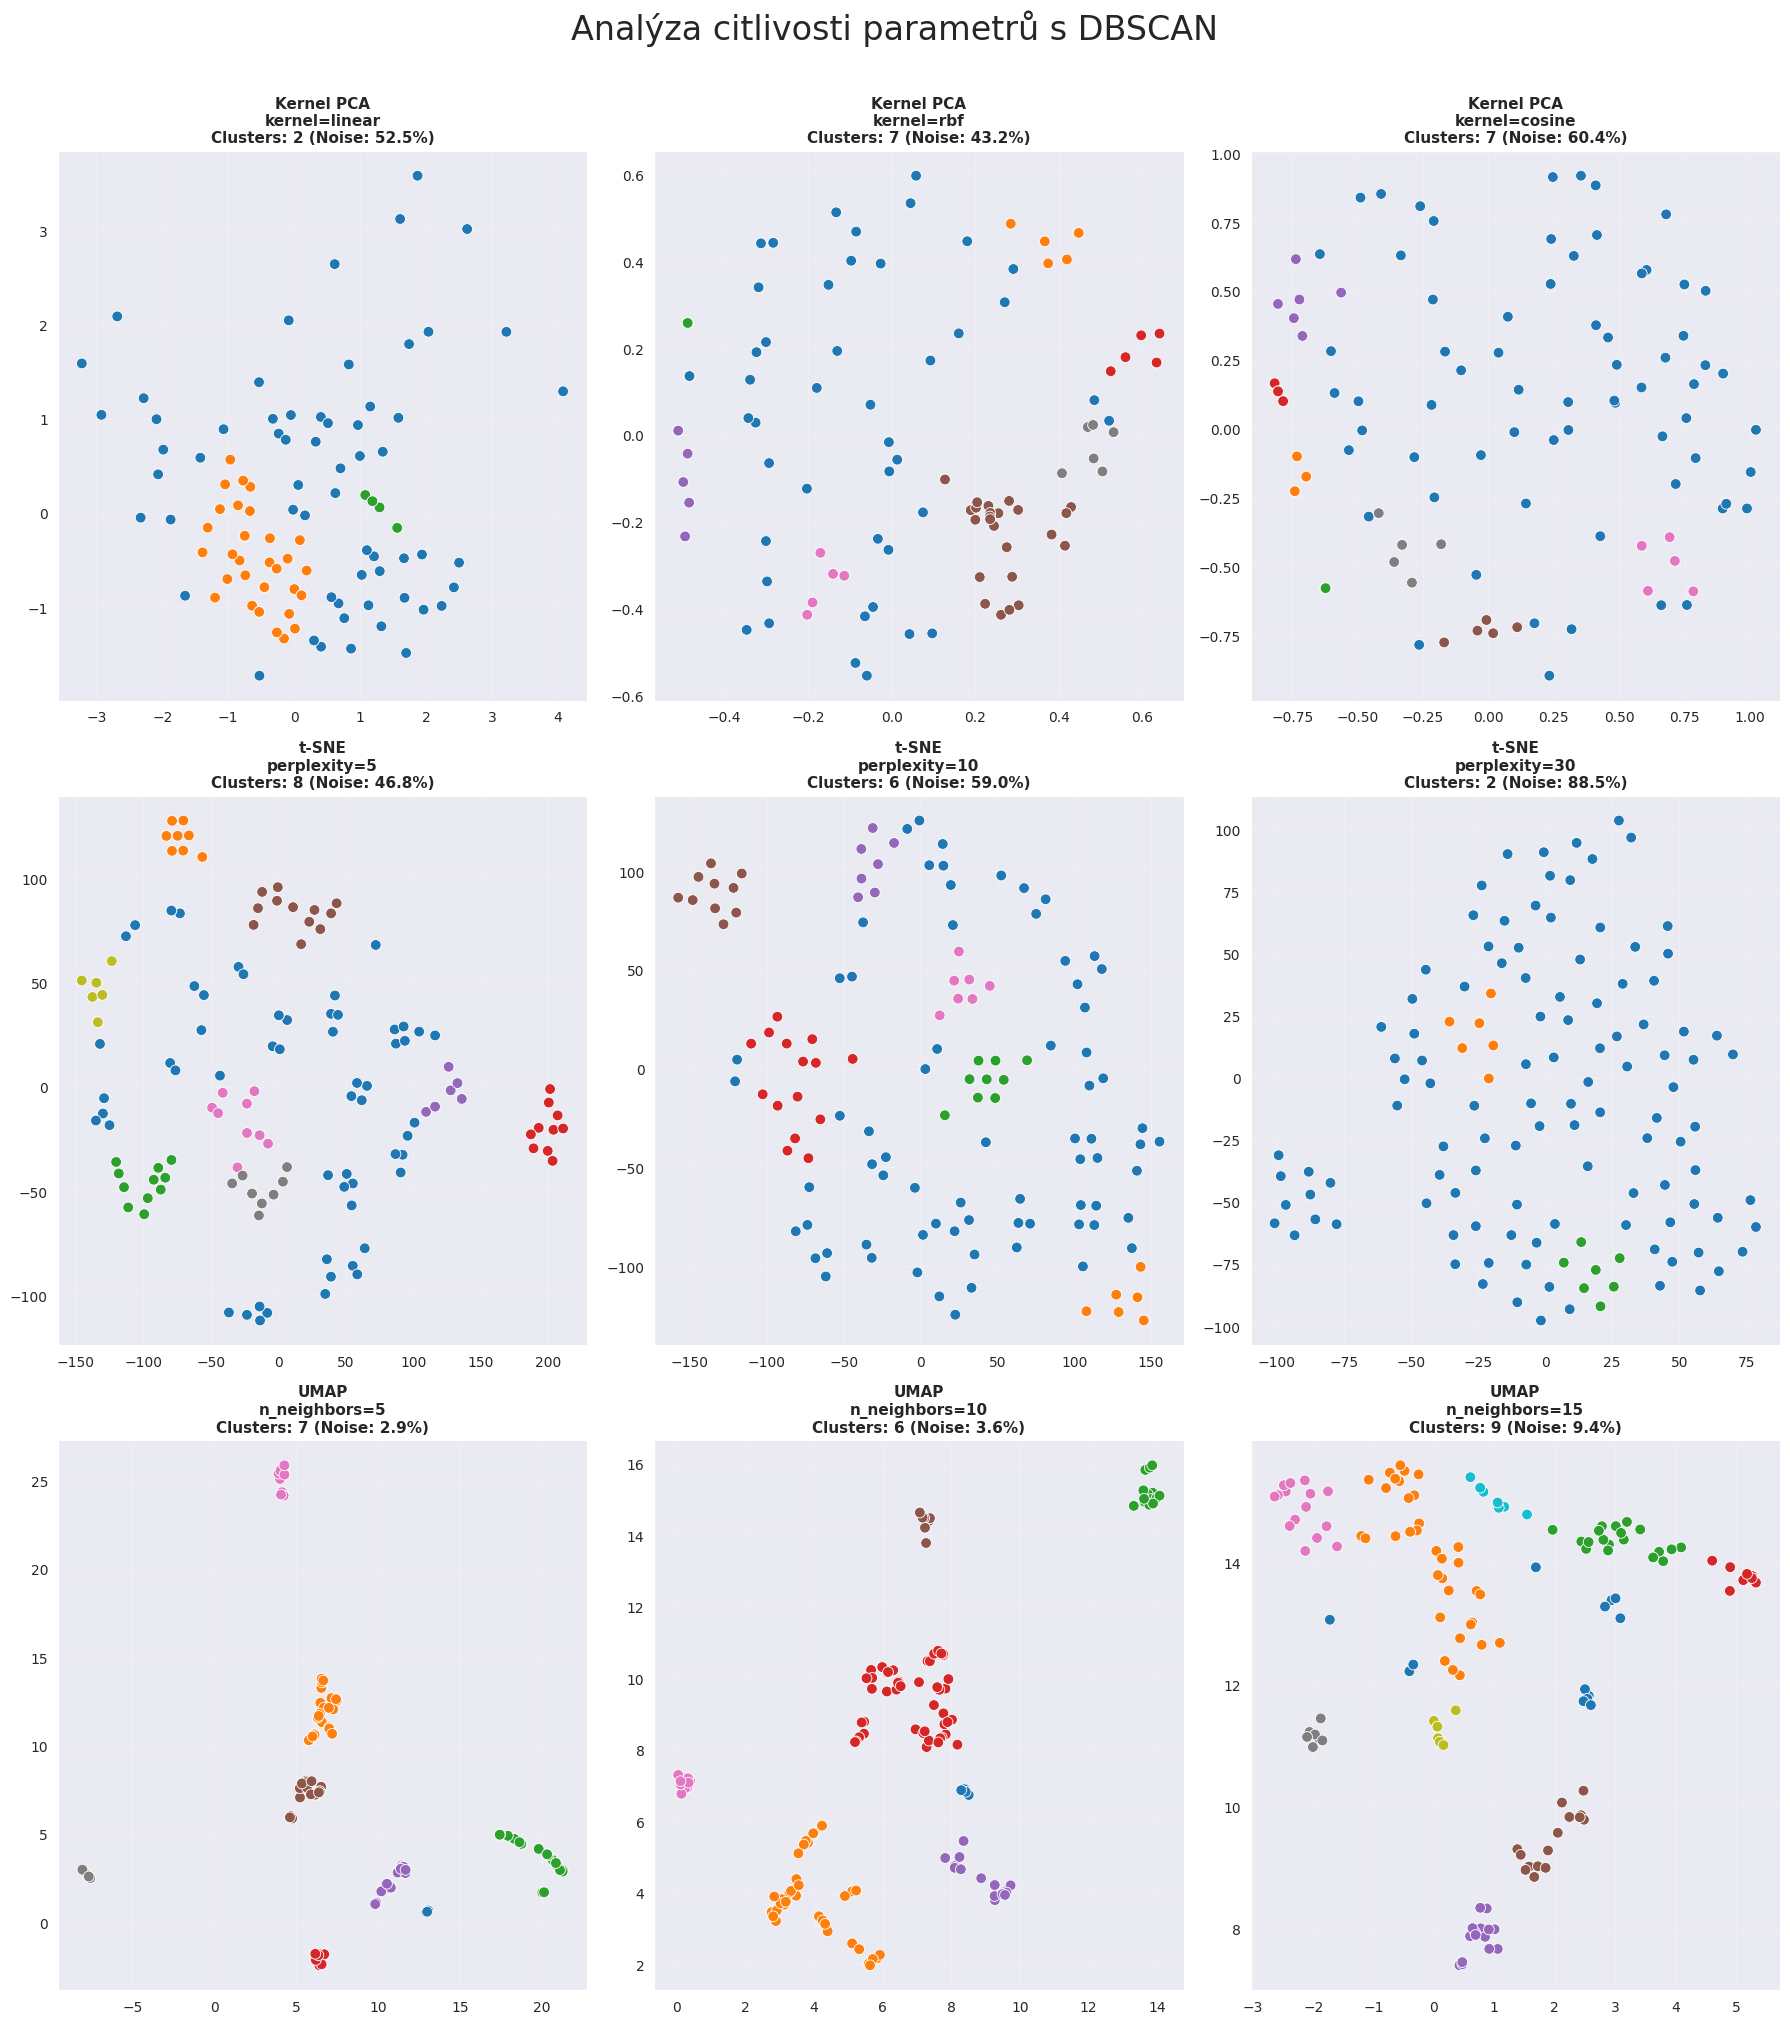

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN  # Změna importu
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

stage_code = 2  # Undergraduate

subset = df  # Ponecháno dle tvého zadání (všechna data)
X = subset[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. NASTAVENÍ EXPERIMENTU ---
experiments = {
    'Kernel PCA': [
        ('kernel', 'linear'),
        ('kernel', 'rbf'),
        ('kernel', 'cosine')
    ],
    't-SNE': [
        ('perplexity', 5),
        ('perplexity', 10),
        ('perplexity', 30),
    ],
    'UMAP': [
        ('n_neighbors', 5),
        ('n_neighbors', 10),
        ('n_neighbors', 15),
    ]
}

# --- 3. VYKRESLENÍ MŘÍŽKY ---
rows = list(experiments.keys())
n_rows = len(rows)
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
fig.suptitle(f'Analýza citlivosti parametrů s DBSCAN', fontsize=24, y=1.01)

for row_idx, method_name in enumerate(rows):
    params_list = experiments[method_name]

    for col_idx, (param_name, param_val) in enumerate(params_list):
        ax = axes[row_idx, col_idx]

        # A) Redukce dimenzí
        if method_name == 'Kernel PCA':
            model = KernelPCA(n_components=2, kernel=param_val, random_state=42)
            X_embedded = model.fit_transform(X_scaled)

        elif method_name == 't-SNE':
            model = TSNE(n_components=2, perplexity=param_val, init='pca', learning_rate='auto', random_state=42)
            X_embedded = model.fit_transform(X_scaled)

        elif method_name == 'UMAP':
            model = umap.UMAP(n_components=2, n_neighbors=param_val, min_dist=0.1, random_state=42)
            X_embedded = model.fit_transform(X_scaled)

        scaler_2d = StandardScaler()
        X_embedded_norm = scaler_2d.fit_transform(X_embedded)

        dbscan = DBSCAN(eps=0.3, min_samples=7)
        clusters = dbscan.fit_predict(X_embedded_norm)

        plot_df = pd.DataFrame(X_embedded, columns=['Dim 1', 'Dim 2']) # Kreslíme původní souřadnice
        plot_df['Cluster'] = clusters

        # Vykreslení - používáme 'tab10', cluster -1 (šum) bude mít jednu z barev
        sns.scatterplot(
            data=plot_df, x='Dim 1', y='Dim 2', hue='Cluster',
            palette='tab10', s=60, ax=ax, legend=False
        )

        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        noise_ratio = (list(clusters).count(-1) / len(clusters)) * 100

        ax.set_title(f'{method_name}\n{param_name}={param_val}\nClusters: {n_clusters} (Noise: {noise_ratio:.1f}%)',
                     fontsize=11, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.grid(True, alpha=0.2)


handles, labels = axes[0, 0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, loc='upper right', title='DBSCAN Cluster')

plt.tight_layout()
plt.savefig("cmp_segm_dbscan.png", dpi=300)
plt.show()

/home/jvlk/miniforge3/envs/zzn-projekt/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


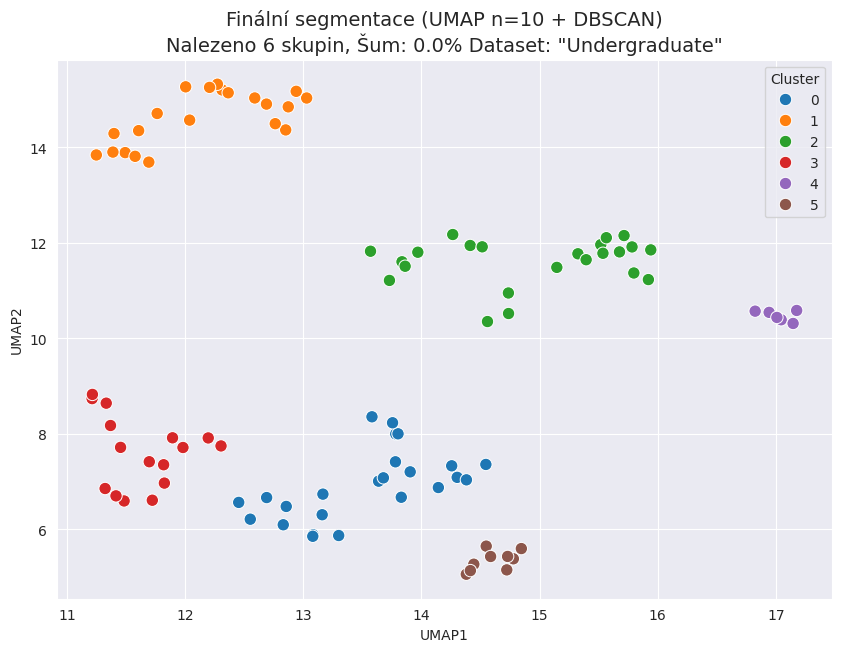

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

stage_code = 2
subset = df[df['Your Academic Stage_encoded'] == stage_code].copy()

features_cluster = [
    'Peer pressure',
    'Academic pressure from your home',
    'Study Environment_encoded',
    'Bad_habits_encoded',
    'What would you rate the academic  competition in your student life'
]


X = subset[features_cluster].dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)


scaler_2d = StandardScaler()
X_umap_norm = scaler_2d.fit_transform(X_umap)


dbscan = DBSCAN(eps=0.35, min_samples=5)
clusters = dbscan.fit_predict(X_umap_norm)


plot_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
plot_df['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df, x='UMAP1', y='UMAP2', hue='Cluster',
    palette='tab10', s=80, legend='full'
)

# Spočítáme statistiku pro titulek
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
noise_pct = (list(clusters).count(-1) / len(clusters)) * 100

plt.title(f'Finální segmentace (UMAP n=10 + DBSCAN)\nNalezeno {n_clusters} skupin, Šum: {noise_pct:.1f}% Dataset: "Undergraduate"', fontsize=14)
plt.savefig("clustering_undergrad.png", dpi=300)
plt.show()

Tabulka průměrných hodnot pro jednotlivé profily:


,Peer pressure,Academic pressure from your home,Study Environment_encoded,Bad_habits_encoded,What would you rate the academic competition in your student life,Stress Index,Počet studentů
Cluster,,,,,,,
0,3.791667,3.458333,2.666667,0.0,4.291667,4.125000,24
1,2.285714,2.238095,1.095238,0.0,2.476190,2.904762,21
2,2.652174,3.086957,1.043478,0.0,4.043478,3.608696,23
3,3.062500,3.125000,2.750000,0.0,2.437500,3.562500,16
4,4.166667,2.833333,1.000000,0.0,4.166667,4.333333,6
5,3.666667,3.555556,2.222222,1.0,3.888889,4.333333,9


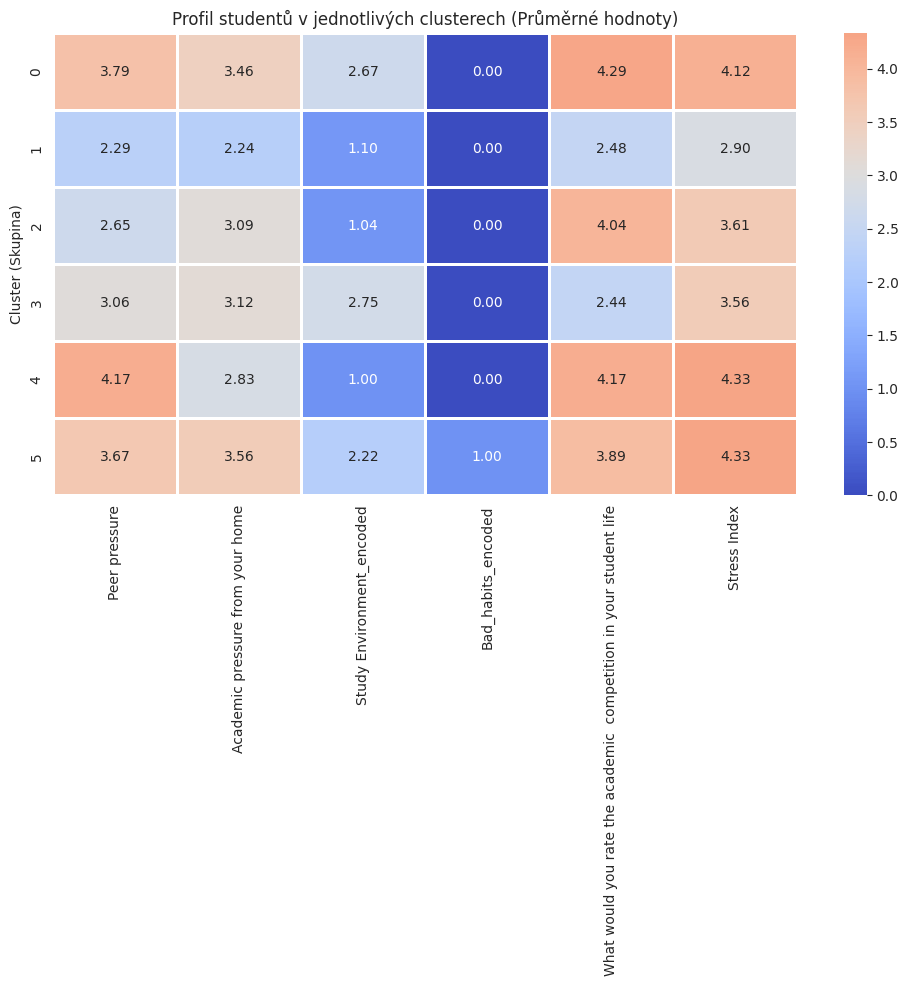

In [76]:

df_analysis = X.copy()
df_analysis['Cluster'] = clusters


df_analysis['Stress Index'] = subset.loc[X.index, 'Rate your academic stress index ']


cluster_means = df_analysis.groupby('Cluster').mean()


cluster_counts = df_analysis['Cluster'].value_counts()
cluster_means['Počet studentů'] = cluster_counts


cluster_means = cluster_means.sort_index()

print("Tabulka průměrných hodnot pro jednotlivé profily:")
display(cluster_means)


plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_means.drop(columns=['Počet studentů']),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=1,
    center=3  # Střed barevné škály na hodnotě 3 (neutrální hodnocení)
)
plt.title('Profil studentů v jednotlivých clusterech (Průměrné hodnoty)')
plt.ylabel('Cluster (Skupina)')
plt.savefig("matrix_clusters_all.png")
plt.show()

/home/jvlk/miniforge3/envs/zzn-projekt/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


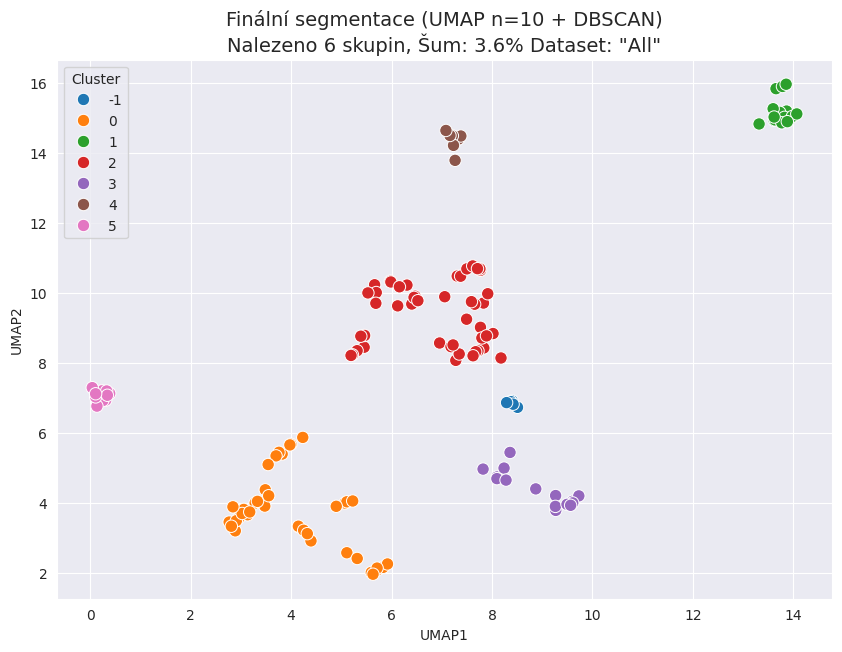

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

subset = df



X = subset[features_cluster].dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)


scaler_2d = StandardScaler()
X_umap_norm = scaler_2d.fit_transform(X_umap)



dbscan = DBSCAN(eps=0.3, min_samples=7)
clusters = dbscan.fit_predict(X_umap_norm)


plot_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
plot_df['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df, x='UMAP1', y='UMAP2', hue='Cluster',
    palette='tab10', s=80, legend='full'
)

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
noise_pct = (list(clusters).count(-1) / len(clusters)) * 100

plt.title(f'Finální segmentace (UMAP n=10 + DBSCAN)\nNalezeno {n_clusters} skupin, Šum: {noise_pct:.1f}% Dataset: "All"', fontsize=14)
plt.savefig("clustering_all.png", dpi=300)
plt.show()

Tabulka průměrných hodnot pro jednotlivé profily:


,Peer pressure,Academic pressure from your home,Study Environment_encoded,Bad_habits_encoded,What would you rate the academic competition in your student life,Stress Index,Počet studentů
Cluster,,,,,,,
-1,2.000000,3.000000,2.000000,0.0,2.600000,3.600000,5
0,2.666667,3.051282,1.076923,0.0,2.641026,3.179487,39
1,3.000000,2.733333,1.066667,0.0,4.200000,3.533333,15
2,3.638298,3.425532,2.702128,0.0,3.638298,4.042553,47
3,1.600000,3.066667,1.333333,0.0,4.266667,3.600000,15
4,4.250000,2.875000,1.125000,0.0,4.125000,4.375000,8
5,3.700000,3.500000,2.300000,1.0,3.700000,4.300000,10


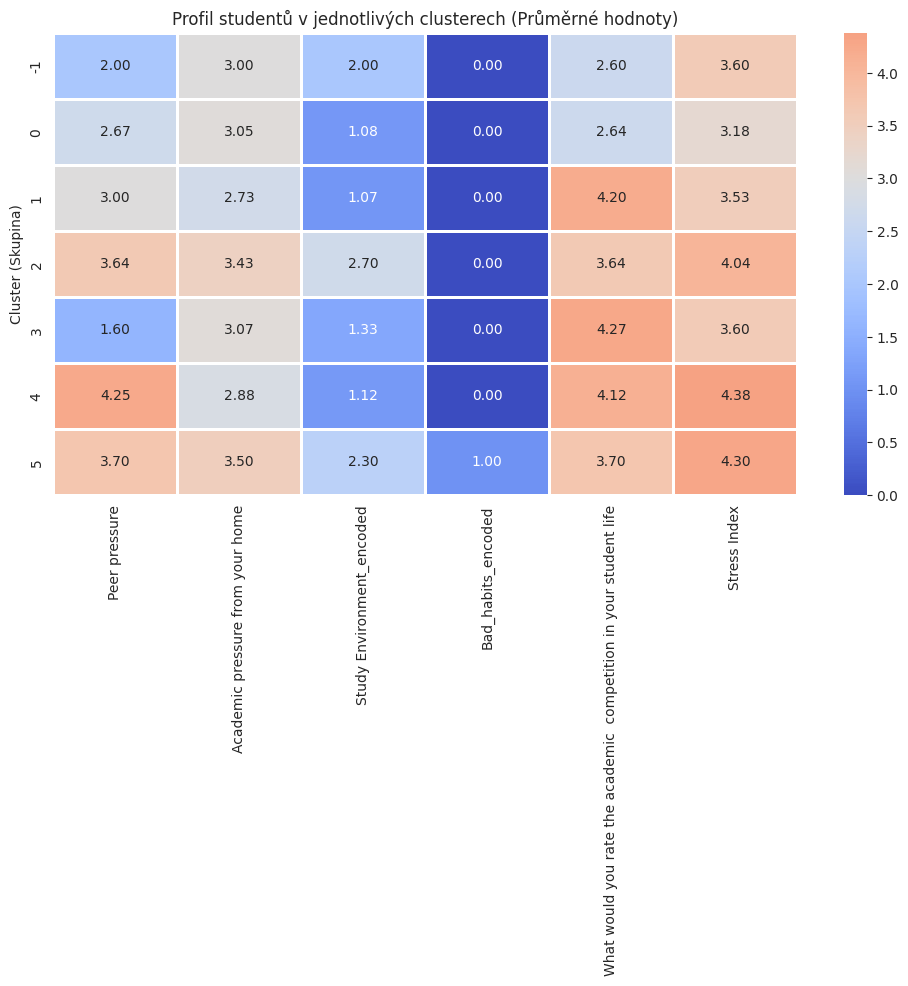

In [78]:

df_analysis = X.copy()
df_analysis['Cluster'] = clusters


df_analysis['Stress Index'] = subset.loc[X.index, 'Rate your academic stress index ']


cluster_means = df_analysis.groupby('Cluster').mean()


cluster_counts = df_analysis['Cluster'].value_counts()
cluster_means['Počet studentů'] = cluster_counts


cluster_means = cluster_means.sort_index()


print("Tabulka průměrných hodnot pro jednotlivé profily:")
display(cluster_means)


plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_means.drop(columns=['Počet studentů']),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=1,
    center=3  # Střed barevné škály na hodnotě 3 (neutrální hodnocení)
)
plt.title('Profil studentů v jednotlivých clusterech (Průměrné hodnoty)')
plt.ylabel('Cluster (Skupina)')
plt.savefig("matrix_clusters_under.png")
plt.show()